In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
advertisement = pd.read_csv('Advertising.csv')
advertisement.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [34]:
advertisement.shape

(200, 5)

In [35]:
advertisement.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [36]:
advertisement.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [37]:
advertisement.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [38]:
advertisement.drop(['Unnamed: 0'], axis =1, inplace = True)
advertisement.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
advertisement.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
import seaborn as sns


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

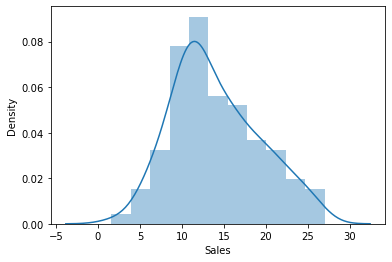

In [47]:
sns.distplot(advertisement.Sales)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


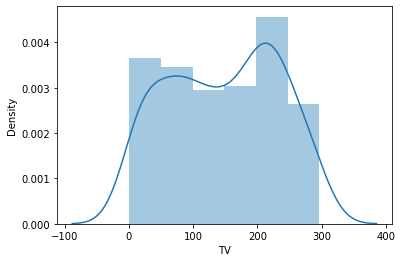

In [45]:
sns.distplot(advertisement.TV);

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


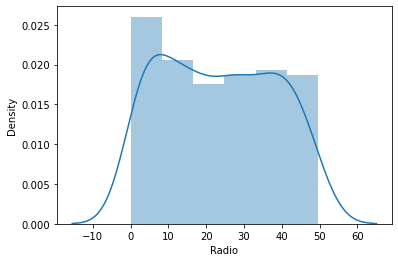

In [49]:
sns.distplot(advertisement.Radio);

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


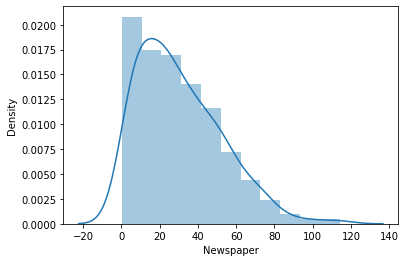

In [51]:
 sns.distplot(advertisement.Newspaper);

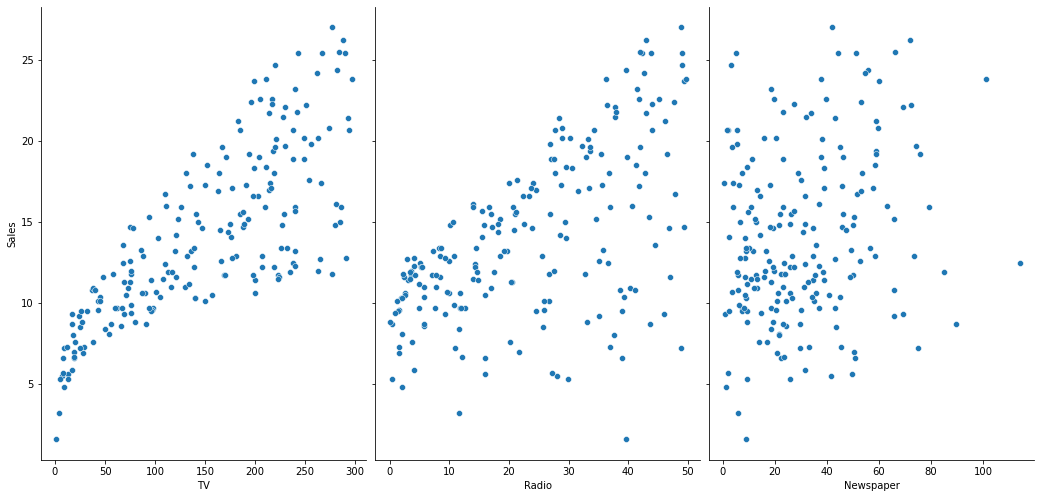

In [53]:
sns.pairplot(advertisement, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7);

In [54]:
advertisement.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


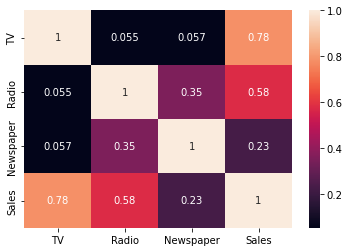

In [55]:
sns.heatmap( advertisement.corr(), annot=True );

In [57]:
X = advertisement[['TV','Radio','Newspaper']]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [58]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [59]:
y = advertisement['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [60]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
print(model.intercept_)
print(model.coef_)

2.9079470208164295
[0.0468431  0.17854434 0.00258619]


In [65]:
y_pred = model.predict(X_test)
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [66]:
model.score( X_test, y_test)

0.8927605914615385

In [67]:

model.score( X_train, y_train)

0.8959372632325174

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
58,23.8,21.735772
40,16.6,16.456938
34,9.5,7.659932
102,14.8,17.892027
184,17.6,18.677307
198,25.5,23.862719
95,16.9,16.336236
4,12.9,13.456492
29,10.5,9.177296
168,17.1,17.360562


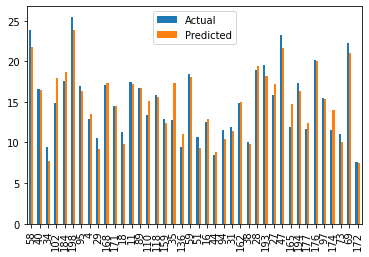

In [91]:
df[['Actual', 'Predicted']].plot(kind='bar')
plt.show()

In [71]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The coeeficient of determination r2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0402154012924711
Mean Squared Error: 1.9918855518287877
Root Mean Squared Error: 1.4113417558581578
The coeeficient of determination r2: 0.8927605914615385
